In [24]:
# Matplotlib 설정
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 시스템에 설치된 폰트 확인. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpatch = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname = fontpatch, size = 10)
fm._rebuild()

#그래프에 retina display 적용 # 맥북 아니면 굳이 안해도 됨
%config InlineBackend.figure_format = 'retina'

#Colab 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')

sys_font number: 27
['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeong

## Decision Tree Classifier

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [26]:
iris = load_iris()
iris.data.dtype

dtype('float64')

In [27]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
#feature가 어떤 것들이 있을까? (몇개?)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
# 시각화를 위해서 특성 2개만을 사용하자. 

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target,
                                                    stratify = iris.target,
                                                    shuffle = True)
X_train.shape, X_test.shape, y_train.shape

((112, 2), (38, 2), (112,))

In [30]:
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns = iris.feature_names[:2])
X_train_df.head()

,sepal length (cm),sepal width (cm)
0,4.7,3.2
1,4.8,3.4
2,6.1,2.8
3,4.4,3.2
4,5.0,2.0


### 모델설정 (Classify)



#### MaxDepth 1

In [31]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=1, 
                                  random_state=0).fit(X_train, y_train)

**Criterion**
: 불순도를 측정하는 방법 선택
- Default: 'gini'
- 'entropy'도 가능
: 둘다 큰 차이가 없지만, 지니가 계산이 빨라 기본으로 사용

**Presort**
- True로 설정하면, 데이터를 미리 정렬하여 속도를 높일수 있음. 단, 데이터가 작을 경우에만 가능. 데이터가 크다면 오히려 속도가 더 느려지게 된다. 

**복잡도 제어 파라미터 (Prunning Parameter)**  
: Decision Tree는 일반적으로 훈련할 때 제약사항이 없어, train data와 최대한 가깝게 맞추려고 한다. 
=> 자연스럽게 모델은 과적함(Overfitting)된다. 
=> 사이킷런 과적합 방지 파라미터
1. max_depth 트리의 최대 깊이 제어 명령
2. min_sample_split 분할되기 위해 노드가 가져야 할 최소 샘플 수 지정
3. min_sample_leaf 리프노드가 가지고 있어야 할 최소 샘플 수 (디폴트는 1)
4. max_feature 각 노드에서 분할 시 사용할 특성의 최대수
5. max_leaf_node 리프노드의 최대 수 지정 


#### 시각화

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree.dot', class_names = iris.target_names,
                feature_names = iris.feature_names[:2], filled = True)

- tree모듈에 export_graphviz를 이용하여 결정트리를 시각화할 수 있다.  
- '.dot' 형식의 파일로 그래프를 저장한다.  
- class_names과 feature_names는 각각 클래스의 명과 특성들의 이름을 설정할 수 있다.  
- filled를 True로 설정하면 노드의 클래스를 구분하기 위해 색이 칠해진다.

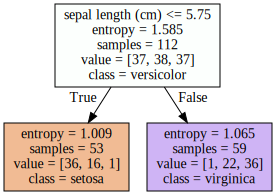

In [33]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

####모델 평가

In [34]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.643
test socre : 0.632


- max_depth를 1로 설정하면 위의 그림처럼 트리가 한 번 분할하게 된다. 점수도 낮은 것을 확인할 수 있다.

In [35]:
import numpy as np

def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()] #배열붙이기
    #np.ravel(x, order='C') : C와 같은 순서로 인덱싱하여 평평하게 배열 (디폴트)
    Z = model.predict(X_pred).reshape(X1.shape) 
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5)
    plt.xlim([4.4, 7.6])
    plt.ylim([2, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$") 

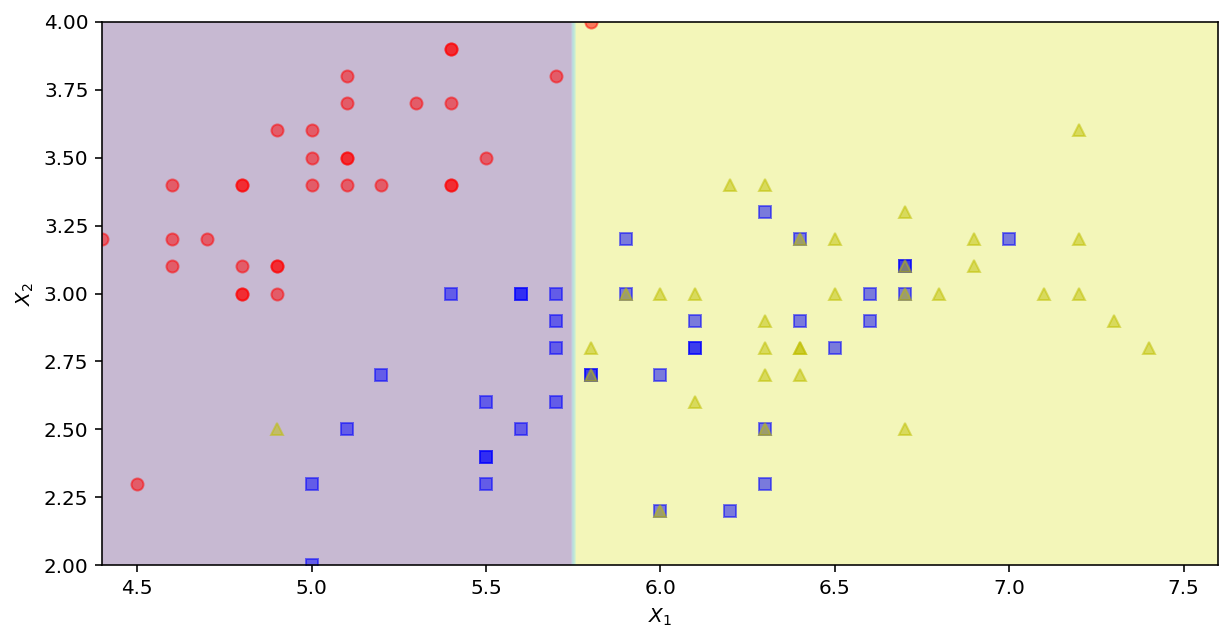

In [36]:
model_border(model_dt, X_train, y_train)

결정트리의 경계가 제대로 형성되지 않았다. 

#### MaxDepth 6


In [37]:
X_train.shape, y_train.shape, X_test.shape

((112, 2), (112,), (38, 2))

In [38]:
# 현재 Train set의 특성은 2개 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state = 0, presort = True)
model_dt.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=0, splitter='best')

In [39]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree2.dot', class_names = iris.target_names, 
                feature_names = iris.feature_names[:2], filled = True)

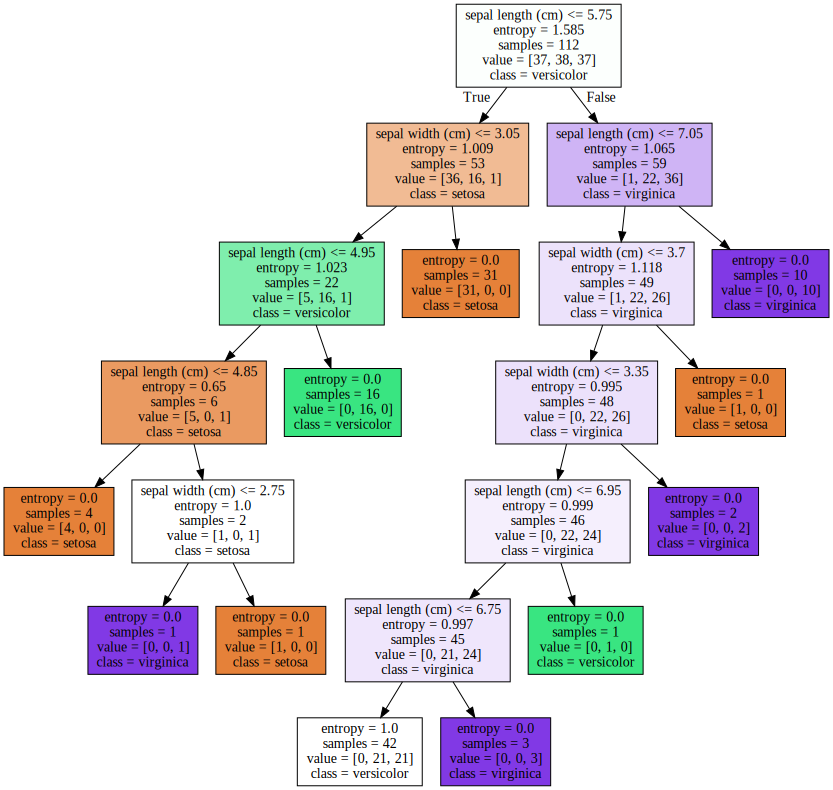

In [40]:
import graphviz

with open('tree2.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.812
test socre : 0.632


max_depth를 6로 설정한 결과이다. 이전의 모델보다 깊게 설정한 결과 과적합이 발생했다.

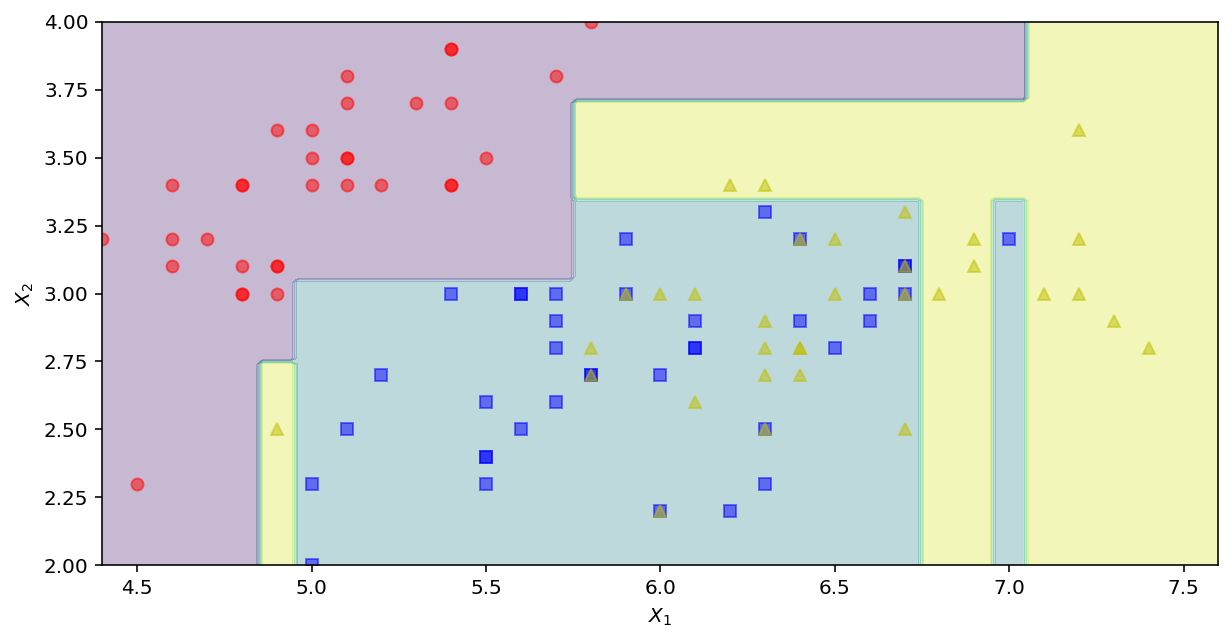

In [42]:
model_border(model_dt, X_train, y_train)

max_depth를 6로 설정하였더니 결정트리의 경계가 더 많이 생성된 것을 볼 수 있다.

In [43]:
# 특성의 중요도를 살펴보기 위해 모든 특성 사용

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify = iris.target, shuffle = True)

model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6, random_state = 0, presort = True).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [44]:
model_dt.feature_importances_

array([0.01126742, 0.        , 0.0670697 , 0.92166288])

In [46]:
iris.data.shape

(150, 4)

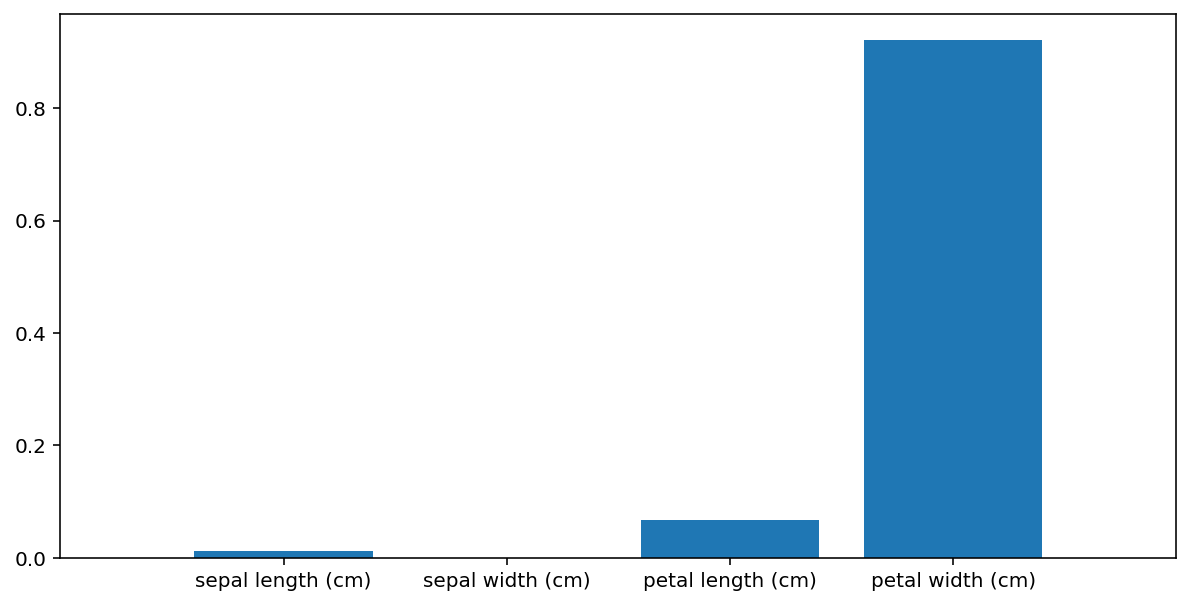

In [54]:
# 특성 중요도 그래프 그리기
plt.figure(figsize =(10,5))
plt.bar(np.arange(iris.data.shape[1]),model_dt.feature_importances_)
plt.xticks(np.arange(iris.data.shape[1]), iris.feature_names)
plt.xlim(-1, iris.data.shape[1])
plt.show()

- sepal length 특성은 트리모델에서 전혀 사용되지 않았으며, 가장 중요한 특성은 petal width 


## Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [56]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    test_size = 0.2, shuffle = True)

In [57]:
# 모델설정 max_depth = 1
tree_reg = DecisionTreeRegressor(criterion='mse', max_depth =1, random_state = 0).fit(X_train, y_train)

- DecisionTreeClassifier와 똑같은 파라미터들을 갖고 있다. 
- criterion의 경우, 기본값으로 평균제곱오차 'mse'로 설정되어 있다. 
- 그 외에 프리드먼 개선 점수, 'fridman_mse'(평균 제곱오차), 'mae'(터미널 노드의 중간값을 사용하여 L1 loss를 최소화)
- 터미널 노드는 가지가 밑으로 더이상 생성되지 않는 노드를 말한다. Leaf node라고도 한다. 

In [62]:
from sklearn.tree import export_graphviz
export_graphviz (tree_reg, out_file = 'tree_reg.dot', 
                 feature_names = boston.feature_names, filled= True)

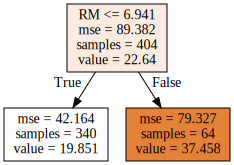

In [65]:
import graphviz

with open('tree_reg.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [66]:
print("train score : {:.3f}".format(tree_reg.score(X_train, y_train)))
print("test score : {:.3f}".format(tree_reg.score(X_test, y_test)))

train score : 0.462
test score : 0.397


In [67]:
# 모델설정 max_depth = 4
tree_reg = DecisionTreeRegressor(criterion='mse', max_depth = 4, random_state = 0).fit(X_train, y_train)

In [68]:
from sklearn.tree import export_graphviz
export_graphviz(tree_reg, out_file = 'tree_reg4.dot', 
                feature_names = boston.feature_names, filled = True)

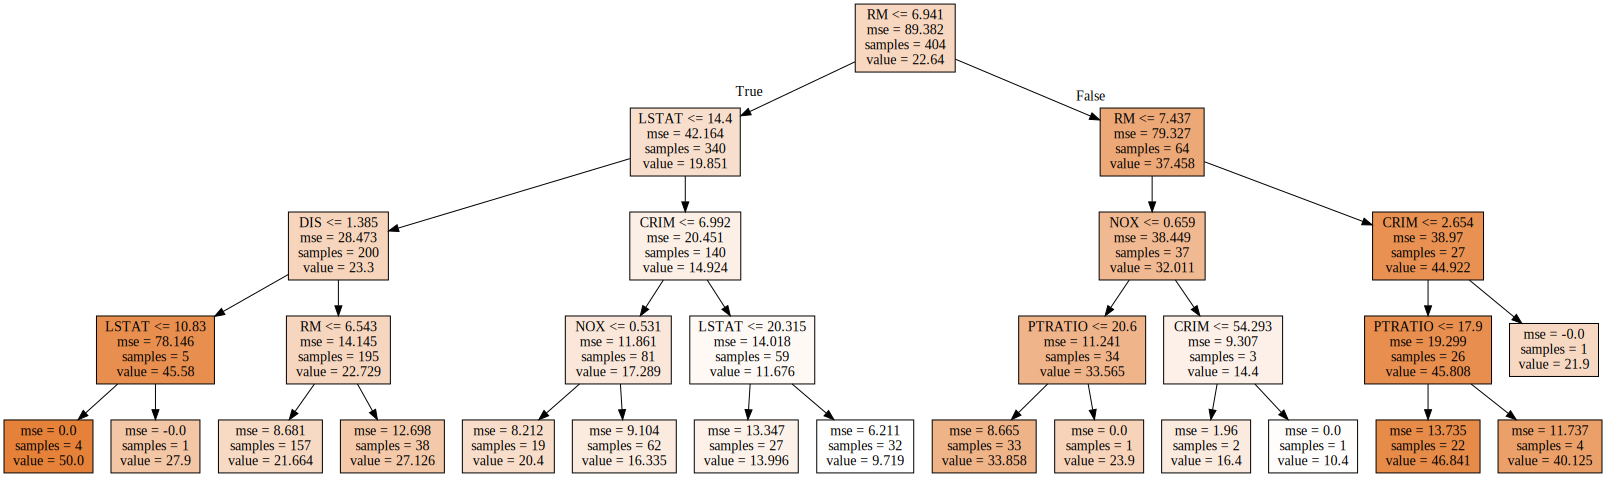

In [70]:
import graphviz

with open('tree_reg4.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [71]:
print("train score : {:.3f}".format(tree_reg.score(X_train, y_train)))
print("test score : {:.3f}".format(tree_reg.score(X_test, y_test)))

train score : 0.896
test score : 0.782


- 결정트리는 가지치기를 사용함에도 과적합되는 경향이 있어 일반화 성능이 좋지 않다. 
- 이런 문제에 대한 대안으로 앙상블 방법이 있다. 